# Sentimental polarity analisys searching tweets by **blackfraude**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# pd.set_option('display.max_colwidth',362)

In [2]:
data = pd.read_json('./tweets1.json',encoding='utf-8')

In [3]:
data.head()

,fullname,html,id,likes,replies,retweets,text,timestamp,url,user
0,Ricardo André,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063197496304967680,0,1,0,Hahahahah... Todo ano é essa mentira na BlackF...,2018-11-15 22:30:11,/RickRock_1975/status/1063197496304967682,RickRock_1975
1,Bruno Gabriel Silva,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063172546097491968,0,0,0,BlackFraude então... ?,2018-11-15 20:51:02,/Sescok/status/1063172546097491970,Sescok
2,Franklin,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063129511531896832,1,2,0,amanhã é blackfraude,2018-11-15 18:00:02,/franklin_lessa/status/1063129511531896834,franklin_lessa
3,André Soares,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063121139432673280,0,2,0,Alerta de #BlackFraude no Walmart e Sams Club....,2018-11-15 17:26:46,/AndreSoares85/status/1063121139432673281,AndreSoares85
4,Renan Dias,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063110536387313664,12,3,4,ABSURDO!\n@pontofrio @submarino @americanascom...,2018-11-15 16:44:38,/ree_atwood/status/1063110536387313665,ree_atwood


In [4]:
data.shape

(312, 10)

In [5]:
# cleaning data
df = data.drop(columns=['html','url','likes','replies','retweets','id'])

In [6]:
df["comment_length"]= df["text"].str.len() 

In [7]:
df['comment_length'].describe()

count    312.000000
mean     133.150641
std       81.100785
min       11.000000
25%       65.000000
50%      110.000000
75%      200.000000
max      362.000000
Name: comment_length, dtype: float64

In [8]:
bigger_comment = df.loc[df['comment_length'] == 362]
bigger_comment

,fullname,text,timestamp,user,comment_length
24,Ecologistas Zaragoza,¡Pasa del consumismo estúpido! #DiaSinCompras2...,2018-11-18 22:42:54,ecologistaszgz,362


In [9]:
df["cluster"]= df["comment_length"].apply(lambda x: 'LST' if x <= 100 else( 'MDN' if x>=133 and x>200 else 'BGR'))

In [10]:
df.head()

,fullname,text,timestamp,user,comment_length,cluster
0,Ricardo André,Hahahahah... Todo ano é essa mentira na BlackF...,2018-11-15 22:30:11,RickRock_1975,116,BGR
1,Bruno Gabriel Silva,BlackFraude então... ?,2018-11-15 20:51:02,Sescok,22,LST
2,Franklin,amanhã é blackfraude,2018-11-15 18:00:02,franklin_lessa,20,LST
3,André Soares,Alerta de #BlackFraude no Walmart e Sams Club....,2018-11-15 17:26:46,AndreSoares85,198,BGR
4,Renan Dias,ABSURDO!\n@pontofrio @submarino @americanascom...,2018-11-15 16:44:38,ree_atwood,274,MDN


# Bar chart of class proportion

In [11]:
LST_len = df[df['cluster'] == 'LST'].shape[0]
MDN_len = df[df['cluster'] == 'MDN'].shape[0]
BGR_len = df[df['cluster'] == 'BGR'].shape[0]

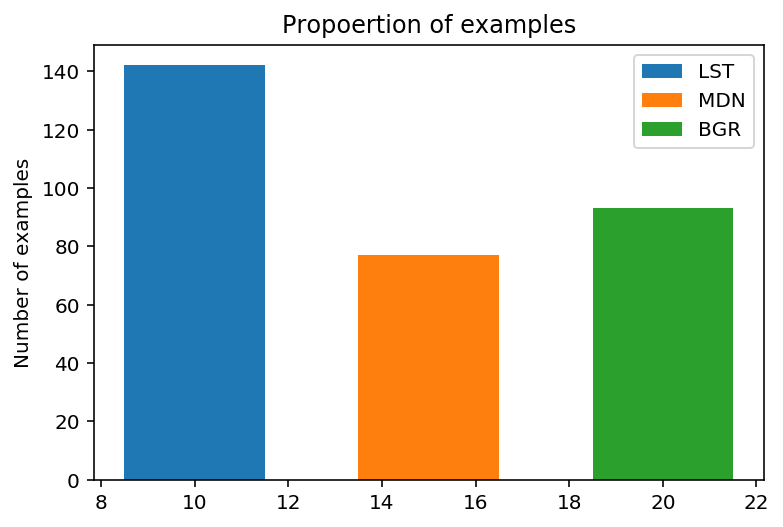

In [12]:
# bar plot of the 3 classes
plt.bar(10,LST_len,3, label="LST")
plt.bar(15,MDN_len,3, label="MDN")
plt.bar(20,BGR_len,3, label="BGR")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

# Setting sentiment polarity

In [13]:
polarities = []
for text in df['text']:
    phrase = TextBlob(text)
    if phrase.sentiment.polarity > 0:
        polarities.append('POSITIVE')
    else:
        polarities.append('NEGATIVE')

In [14]:
df['polarities'] = polarities

In [15]:
df['polarities'].describe()

count          312
unique           2
top       NEGATIVE
freq           291
Name: polarities, dtype: object

# Finding Top words

## Removing punctions

In [16]:
def remove_punctuation(text):
    import string
    
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [17]:
df['text'] = df['text'].apply(remove_punctuation)
df.head(10)

,fullname,text,timestamp,user,comment_length,cluster,polarities
0,Ricardo André,Hahahahah Todo ano é essa mentira na BlackFrau...,2018-11-15 22:30:11,RickRock_1975,116,BGR,NEGATIVE
1,Bruno Gabriel Silva,BlackFraude então,2018-11-15 20:51:02,Sescok,22,LST,NEGATIVE
2,Franklin,amanhã é blackfraude,2018-11-15 18:00:02,franklin_lessa,20,LST,NEGATIVE
3,André Soares,Alerta de BlackFraude no Walmart e Sams Club L...,2018-11-15 17:26:46,AndreSoares85,198,BGR,NEGATIVE
4,Renan Dias,ABSURDO\npontofrio submarino americanascom fas...,2018-11-15 16:44:38,ree_atwood,274,MDN,POSITIVE
5,H E R I C 🐔,Brasileiro transforma a BlackFriday em BlackFr...,2018-11-15 13:34:43,Jr_heric,52,LST,NEGATIVE
6,David Moraes,Passando novamente para dizer que a BlackFraud...,2018-11-15 01:34:01,David__Moraes,174,BGR,NEGATIVE
7,dona aranha,Aiai eu anotando data de inicio de blackfraude...,2018-11-15 00:49:43,romulosotnas,97,LST,NEGATIVE
8,Heber Gouveia,A BlackFraude começou Estou acompanhando o pre...,2018-11-13 22:56:34,GouveiaHeber,136,BGR,NEGATIVE
9,Ciel Lykos 🔱,Black Friday chegando \n\nNo Brasil é Black Fr...,2018-11-13 22:17:56,ciellykos,171,BGR,NEGATIVE


In [18]:
# extracting the stopwords from nltk library
sw = stopwords.words('portuguese')
# displaying the stopwords
np.array(sw)

array(['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com',
       'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos',
       'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou',
       'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo',
       'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo',
       'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa',
       'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos',
       'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas',
       'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus',
       'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos',
       'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele',
       'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está',
       'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram',
       'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos',
  

In [19]:
len(sw)

203

In [20]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [21]:
df['text'] = df['text'].apply(stopwords)
df.head(10)

,fullname,text,timestamp,user,comment_length,cluster,polarities
0,Ricardo André,hahahahah todo ano é mentira blackfraude https...,2018-11-15 22:30:11,RickRock_1975,116,BGR,NEGATIVE
1,Bruno Gabriel Silva,blackfraude então,2018-11-15 20:51:02,Sescok,22,LST,NEGATIVE
2,Franklin,amanhã é blackfraude,2018-11-15 18:00:02,franklin_lessa,20,LST,NEGATIVE
3,André Soares,alerta blackfraude walmart sams club lenço ume...,2018-11-15 17:26:46,AndreSoares85,198,BGR,NEGATIVE
4,Renan Dias,absurdo pontofrio submarino americanascom fast...,2018-11-15 16:44:38,ree_atwood,274,MDN,POSITIVE
5,H E R I C 🐔,brasileiro transforma blackfriday blackfraude,2018-11-15 13:34:43,Jr_heric,52,LST,NEGATIVE
6,David Moraes,passando novamente dizer blackfraude começou s...,2018-11-15 01:34:01,David__Moraes,174,BGR,NEGATIVE
7,dona aranha,aiai anotando data inicio blackfraude loja tud...,2018-11-15 00:49:43,romulosotnas,97,LST,NEGATIVE
8,Heber Gouveia,blackfraude começou acompanhando preço tv 4k s...,2018-11-13 22:56:34,GouveiaHeber,136,BGR,NEGATIVE
9,Ciel Lykos 🔱,black friday chegando brasil é black fraude tu...,2018-11-13 22:17:56,ciellykos,171,BGR,NEGATIVE


In [22]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['text'])
# collect used words and vectorizer
dictionary = count_vectorizer.vocabulary_.items()  
dictionary

dict_items([('hahahahah', 853), ('todo', 1713), ('ano', 176), ('mentira', 1089), ('blackfraude', 259), ('httpstwittercomwilliamsjosemirstatus1063088317737115651', 891), ('então', 673), ('amanhã', 165), ('alerta', 149), ('walmart', 1840), ('sams', 1581), ('club', 409), ('lenço', 1008), ('umedecido', 1747), ('pampers', 1270), ('misteriosamente', 1113), ('preço', 1421), ('1199', 9), ('sempre', 1599), ('ficou', 771), ('media', 1076), ('799', 76), ('blackfriday', 262), ('vai', 1756), ('estar', 702), ('899', 83), ('percam', 1309), ('absurdo', 95), ('pontofrio', 1389), ('submarino', 1655), ('americanascom', 169), ('fastshop', 750), ('casasbahia', 362), ('magazineluiza', 1056), ('diversas', 591), ('outras', 1249), ('lojas', 1042), ('aumentaram', 231), ('iphone', 966), ('8plus', 85), ('3500', 53), ('pra', 1403), ('4200', 61), ('bf', 256), ('voltarem', 1821), ('pro', 1432), ('normal', 1180), ('parecer', 1280), ('desconto', 545), ('vergonhoso', 1792), ('brasileiro', 302), ('transforma', 1728), ('

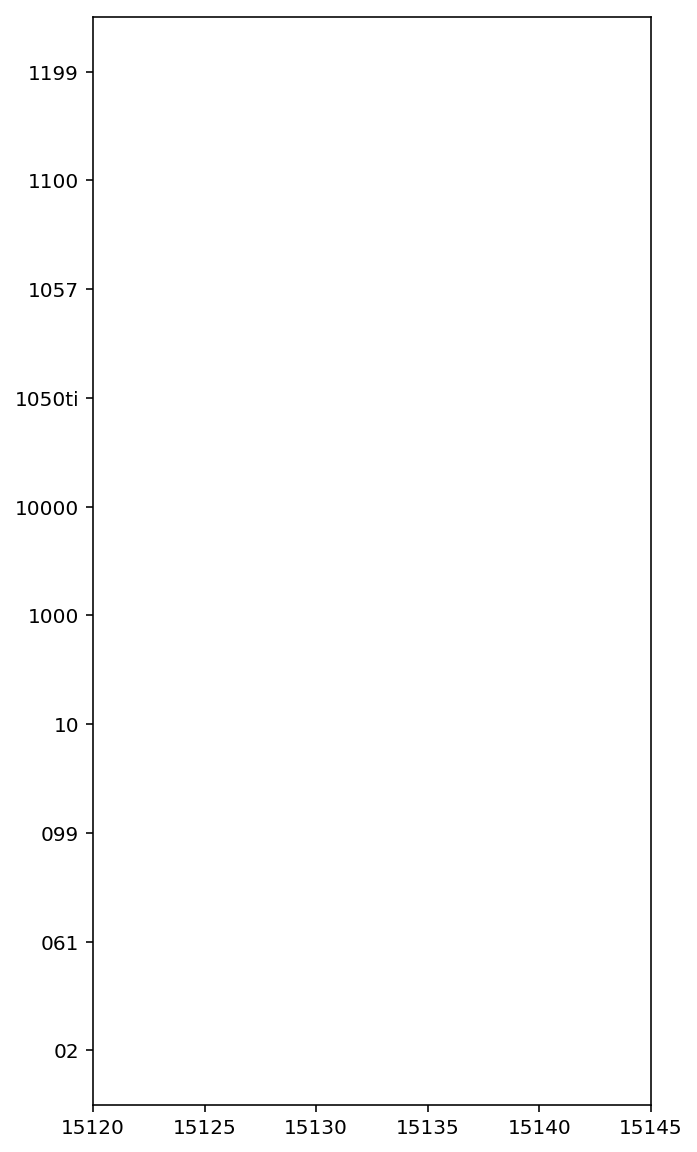

In [23]:
vocab = []
count = []
# count and add each vocab to list
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after = vocab_after.sort_values(ascending=True)
# plot of the top vocab
top_vacab = vocab_after.head(10)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

In [24]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [25]:
df['length'] = df['text'].apply(length)
df.head(10)

,fullname,text,timestamp,user,comment_length,cluster,polarities,length
0,Ricardo André,hahahahah todo ano é mentira blackfraude https...,2018-11-15 22:30:11,RickRock_1975,116,BGR,NEGATIVE,98
1,Bruno Gabriel Silva,blackfraude então,2018-11-15 20:51:02,Sescok,22,LST,NEGATIVE,17
2,Franklin,amanhã é blackfraude,2018-11-15 18:00:02,franklin_lessa,20,LST,NEGATIVE,20
3,André Soares,alerta blackfraude walmart sams club lenço ume...,2018-11-15 17:26:46,AndreSoares85,198,BGR,NEGATIVE,148
4,Renan Dias,absurdo pontofrio submarino americanascom fast...,2018-11-15 16:44:38,ree_atwood,274,MDN,POSITIVE,234
5,H E R I C 🐔,brasileiro transforma blackfriday blackfraude,2018-11-15 13:34:43,Jr_heric,52,LST,NEGATIVE,45
6,David Moraes,passando novamente dizer blackfraude começou s...,2018-11-15 01:34:01,David__Moraes,174,BGR,NEGATIVE,110
7,dona aranha,aiai anotando data inicio blackfraude loja tud...,2018-11-15 00:49:43,romulosotnas,97,LST,NEGATIVE,67
8,Heber Gouveia,blackfraude começou acompanhando preço tv 4k s...,2018-11-13 22:56:34,GouveiaHeber,136,BGR,NEGATIVE,95
9,Ciel Lykos 🔱,black friday chegando brasil é black fraude tu...,2018-11-13 22:17:56,ciellykos,171,BGR,NEGATIVE,145


In [26]:
LST_data = df[df['cluster'] == 'LST']
MDN_data = df[df['cluster'] == 'MDN']
BGR_data = df[df['cluster'] == 'BGR']

## Histogram of text lenght of each writer

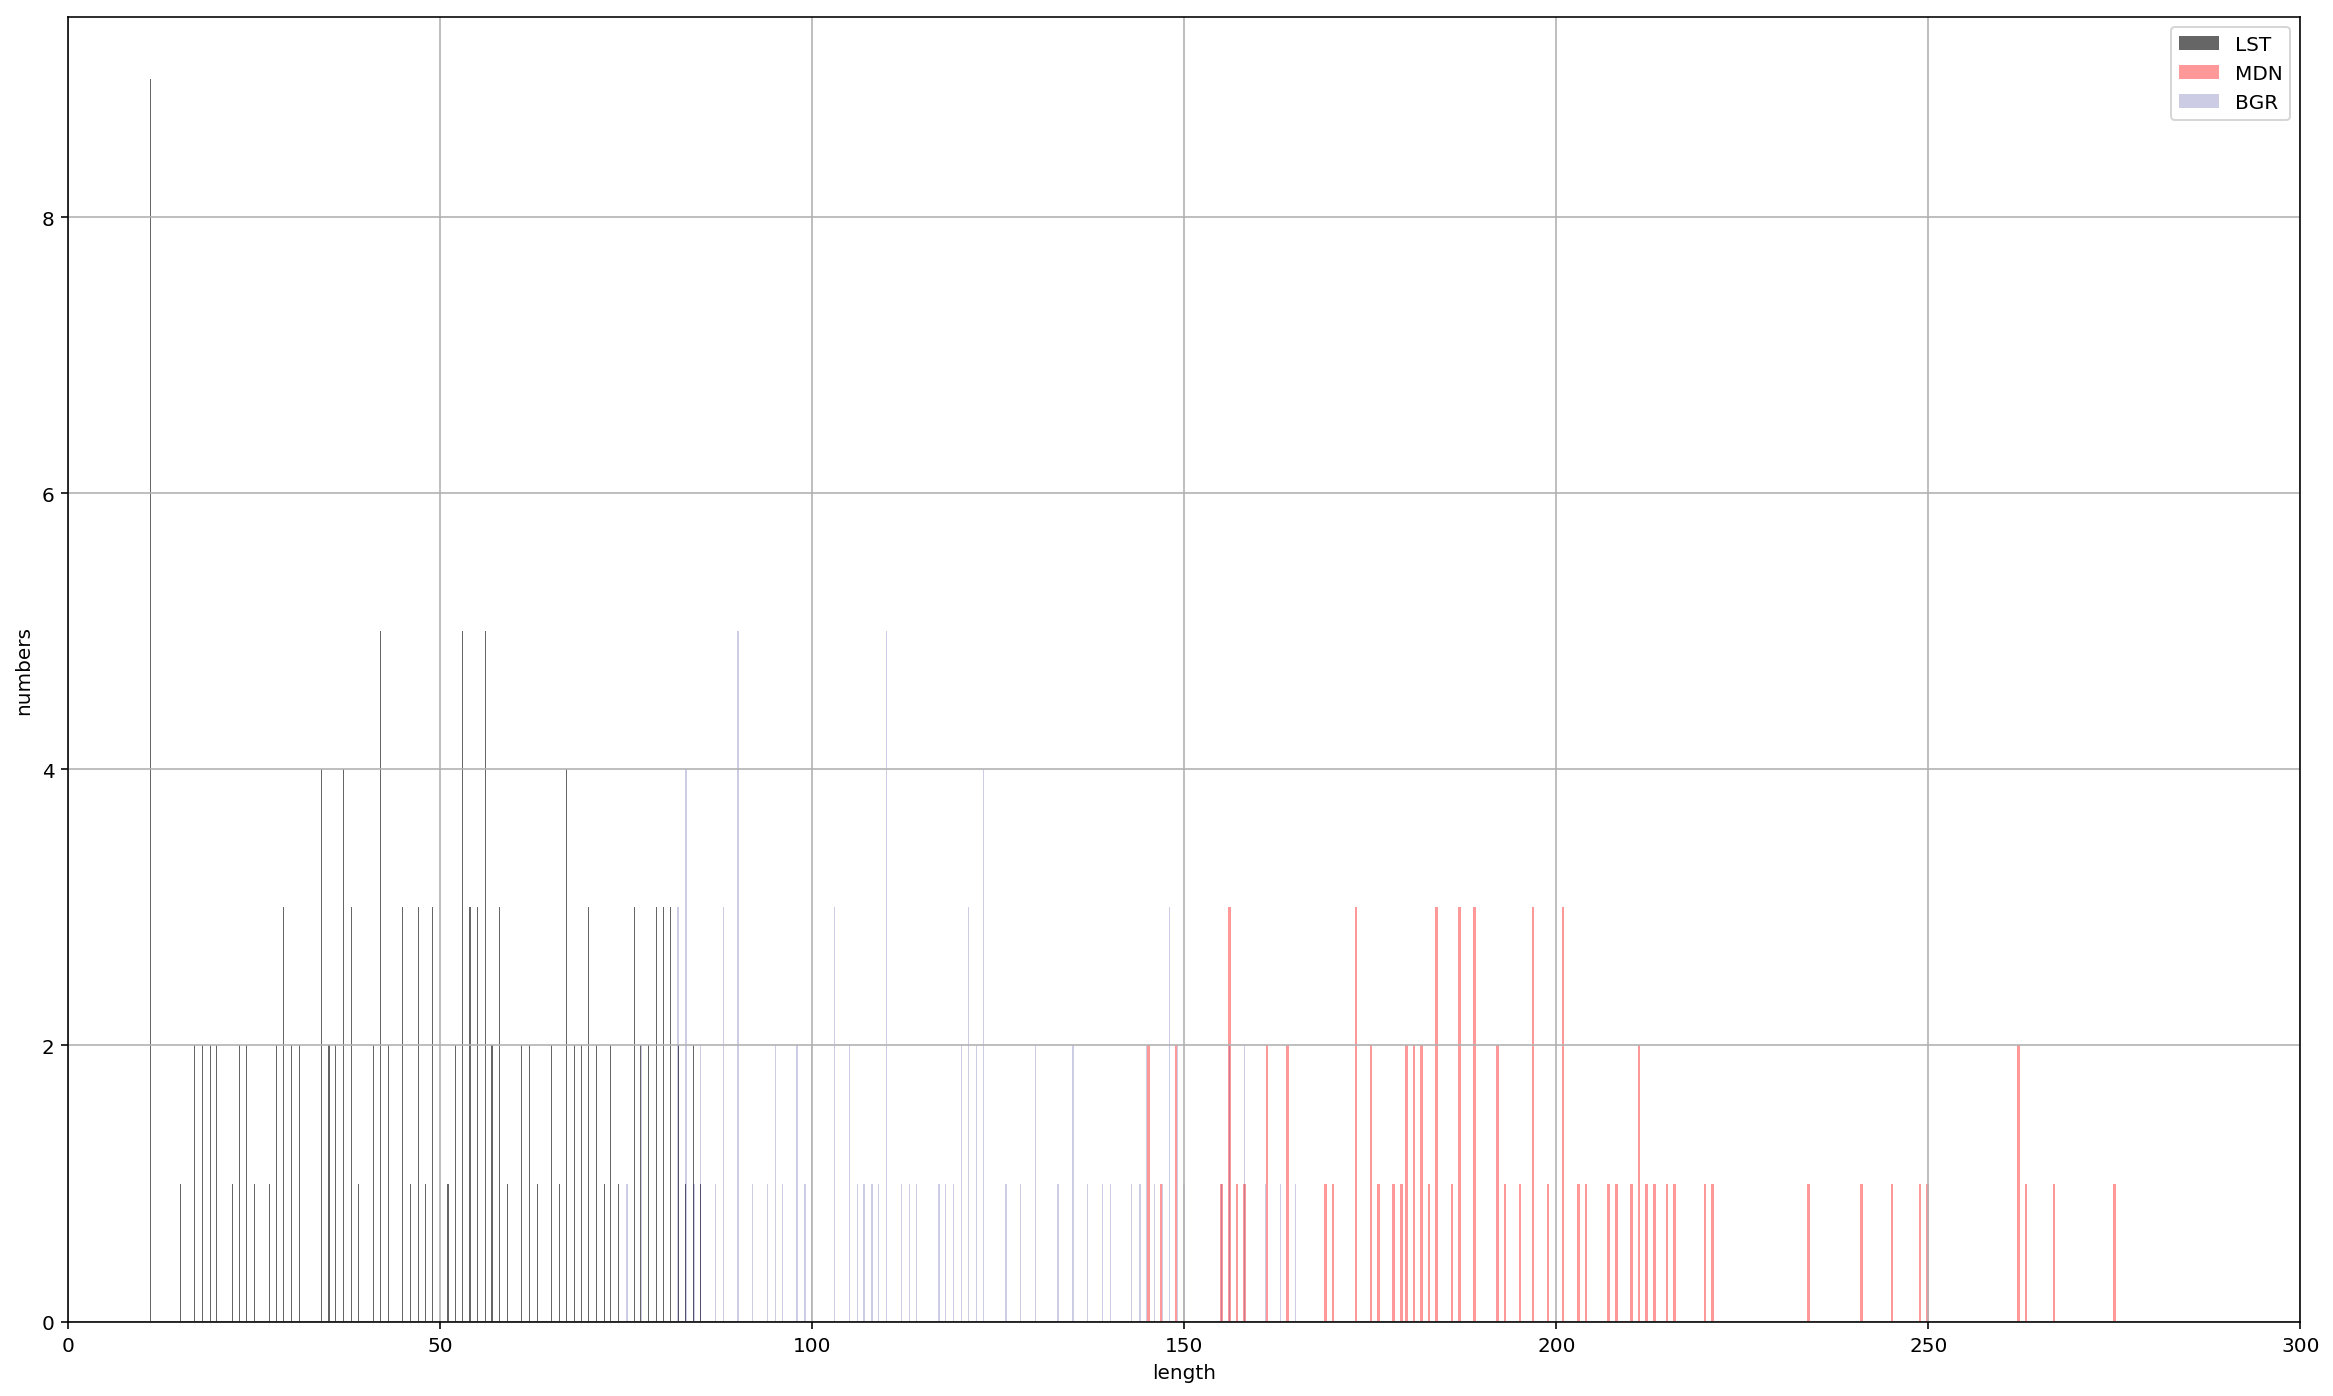

In [27]:
matplotlib.rcParams['figure.figsize'] = (20.0, 12.0)
bins = 500
plt.hist(LST_data['length'], alpha = 0.6, bins=bins, label='LST', color='black')
plt.hist(MDN_data['length'], alpha = 0.4, bins=bins, label='MDN', color='red')
plt.hist(BGR_data['length'], alpha = 0.2, bins=bins, label='BGR', color='navy')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()